In [216]:
train_path = "data/train.csv"
test_path = "data/test.csv"

In [217]:
import numpy as np
import pandas as pd
import math

In [218]:
import statsmodels.api as sm

In [219]:
train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)

In [220]:
train_df.head()

,outcome,categorical,numeric
0,0,3.0,41.0
1,0,1.0,41.0
2,0,3.0,44.0
3,0,3.0,NaN
4,0,NaN,40.0


In [221]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 3 columns):
outcome        195 non-null int64
categorical    190 non-null float64
numeric        191 non-null float64
dtypes: float64(2), int64(1)
memory usage: 4.7 KB


In [222]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
categorical    3 non-null float64
numeric        4 non-null float64
dtypes: float64(2)
memory usage: 208.0 bytes


In [223]:
def concat_df(train_df, test_df):
    return pd.concat([train_df, test_df], sort=True).reset_index(drop=True)

def split_df(df_all):
    return df_all.iloc[:195], df_all.iloc[195:].drop('outcome', axis=1)

df_all = concat_df(train_df, test_df)

In [224]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
categorical    193 non-null float64
numeric        195 non-null float64
outcome        195 non-null float64
dtypes: float64(3)
memory usage: 4.8 KB


In [225]:
medians_by_cat = df_all.groupby('categorical')['numeric'].median()

for cat, median in medians_by_cat.iteritems():
    df_all.loc[(df_all.numeric.isnull()) & (df_all.categorical == cat), 'numeric'] = median

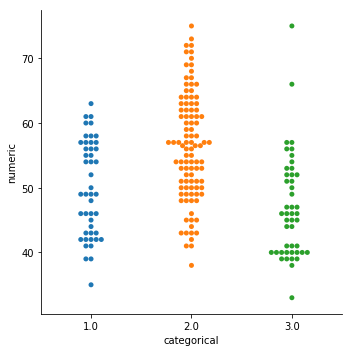

In [226]:
import seaborn as sns

sns.catplot(x='categorical', y= 'numeric', kind="swarm", data=df_all)

In [227]:
df_all.groupby('categorical')['numeric'].median()

categorical
1.0    49.0
2.0    56.5
3.0    46.0
Name: numeric, dtype: float64

In [228]:
df_all[df_all.categorical.isnull()]

,categorical,numeric,outcome
4,NaN,40.0,0.0
7,NaN,40.0,0.0
13,NaN,37.0,0.0
74,NaN,51.0,1.0
141,NaN,64.0,3.0
195,NaN,71.0,NaN
197,NaN,71.0,NaN


In [229]:
df_all.loc[4, 'categorical'] = 3
df_all.loc[7, 'categorical'] = 3
df_all.loc[13, 'categorical'] = 3
df_all.loc[74, 'categorical'] = 1
df_all.loc[141, 'categorical'] = 2
df_all.loc[195, 'categorical'] = 2
df_all.loc[197, 'categorical'] = 2

In [230]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
categorical    200 non-null float64
numeric        200 non-null float64
outcome        195 non-null float64
dtypes: float64(3)
memory usage: 4.8 KB


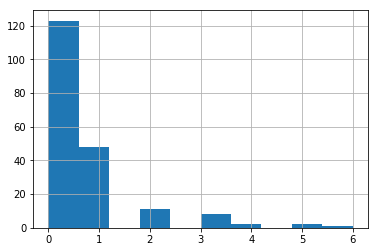

In [231]:
train_df['outcome'].hist()

In [232]:
final_train, final_test = split_df(df_all)

In [233]:
final_train

,categorical,numeric,outcome
0,3.0,41.0,0.0
1,1.0,41.0,0.0
2,3.0,44.0,0.0
3,3.0,46.0,0.0
4,3.0,40.0,0.0
...,...,...,...
190,2.0,69.0,0.0
191,2.0,56.5,1.0
192,2.0,71.0,2.0
193,2.0,71.0,5.0


In [234]:
exog, endog = sm.add_constant(final_train.iloc[:,:-1]), final_train.iloc[:,-1]

In [235]:
#identity-link linear regression
mod = sm.GLM(endog, exog)
res = mod.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                outcome   No. Observations:                  195
Model:                            GLM   Df Residuals:                      192
Model Family:                Gaussian   Df Model:                            2
Link Function:               identity   Scale:                         0.83102
Method:                          IRLS   Log-Likelihood:                -257.13
Date:                Fri, 22 May 2020   Deviance:                       159.56
Time:                        00:24:41   Pearson chi2:                     160.
No. Iterations:                     3   Covariance Type:             nonrobust
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -2.6771      0.470     -5.699      0.000      -3.598      -1.756
categorical     0.1062      0.095      1.112     

In [236]:
#log-link poisson regression
mod = sm.GLM(endog, exog,
            family=sm.families.Poisson(link=sm.families.links.log))
res = mod.fit()

print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                outcome   No. Observations:                  195
Model:                            GLM   Df Residuals:                      192
Model Family:                 Poisson   Df Model:                            2
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -180.67
Date:                Fri, 22 May 2020   Deviance:                       195.51
Time:                        00:24:41   Pearson chi2:                     219.
No. Iterations:                     5   Covariance Type:             nonrobust
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -6.1110      0.763     -8.011      0.000      -7.606      -4.616
categorical     0.1448      0.174      0.834     

In [237]:
final_train.sort_index(axis=1)

,categorical,numeric,outcome
0,3.0,41.0,0.0
1,1.0,41.0,0.0
2,3.0,44.0,0.0
3,3.0,46.0,0.0
4,3.0,40.0,0.0
...,...,...,...
190,2.0,69.0,0.0
191,2.0,56.5,1.0
192,2.0,71.0,2.0
193,2.0,71.0,5.0


## onehot

In [238]:
#onehot
final_train = pd.get_dummies(final_train, columns=['categorical']).sort_index(axis=1)
final_test = pd.get_dummies(final_test, columns=['categorical']).sort_index(axis=1)

In [239]:
exog, endog = sm.add_constant(final_train.iloc[:,:-1]), final_train.iloc[:,-1]

In [240]:
#identity-link linear regression
mod = sm.GLM(endog, exog)
res = mod.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                outcome   No. Observations:                  195
Model:                            GLM   Df Residuals:                      191
Model Family:                Gaussian   Df Model:                            3
Link Function:               identity   Scale:                         0.80779
Method:                          IRLS   Log-Likelihood:                -253.86
Date:                Fri, 22 May 2020   Deviance:                       154.29
Time:                        00:24:50   Pearson chi2:                     154.
No. Iterations:                     3   Covariance Type:             nonrobust
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -1.4982      0.324     -4.620      0.000      -2.134      -0.863
categorical_1.0    -0.7119      0.147

In [241]:
#log-link poisson regression
mod = sm.GLM(endog, exog,
            family=sm.families.Poisson(link=sm.families.links.log))
res = mod.fit()

print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                outcome   No. Observations:                  195
Model:                            GLM   Df Residuals:                      191
Model Family:                 Poisson   Df Model:                            3
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -174.37
Date:                Fri, 22 May 2020   Deviance:                       182.91
Time:                        00:25:02   Pearson chi2:                     210.
No. Iterations:                     5   Covariance Type:             nonrobust
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -3.7676      0.507     -7.433      0.000      -4.761      -2.774
categorical_1.0    -1.6454      0.294